In [199]:
#this is the block of code that generates unrealized profits for companies for which portfolia holder has bought 
#and sold the stocks both.

import pandas as pd
from fpdf import FPDF
import yfinance as yf

# Load the Excel file
df_xlsx = pd.read_excel("Book2.xlsx")

# Filter buy and sell data
data_for_buy = df_xlsx[df_xlsx['TYPE'] == 'Buy']
data_for_sell = df_xlsx[df_xlsx['TYPE'] == 'Sell']

# Summarize the quantities by ticker
buy_summary = data_for_buy.groupby('EXCHANGE CODE: TICKER')['UNITS'].sum().to_dict()
sell_summary = data_for_sell.groupby('EXCHANGE CODE: TICKER')['UNITS'].sum().to_dict()
buy_price_dict = data_for_buy.groupby('EXCHANGE CODE: TICKER')['AMOUNT'].sum().to_dict()
sell_price_dict = data_for_sell.groupby('EXCHANGE CODE: TICKER')['AMOUNT'].sum().to_dict()

# Function to fetch the current stock price using yfinance for Indian stocks
def get_stock_price(ticker):
    try:
        # Assuming NSE symbols, append '.NS' to the ticker. Adjust if using BSE.
        stock = yf.Ticker(f"{ticker[4:]}.NS")  # Use '.BO' for BSE
        price = stock.history(period="1d")['Close'].iloc[-1]  # Get the latest closing price
        return round(float(price), 2)
    except Exception as e:
        print(f"Error fetching price for {ticker[4:]}: {e}")
        return None

net_quant = {key: round((buy_summary[key] - sell_summary[key]), 5) for key in sell_summary if round((buy_summary[key] - sell_summary[key]), 5) != 0}
difference_dict = {key: ((buy_price_dict[key]-sell_price_dict[key])/net_quant[key]) for key in net_quant}
# Calculate the remaining stock and get the current price
result = {}
for key in difference_dict:
    buy_quantity = buy_summary.get(key, 0)
    sell_quantity = sell_summary[key]
    remaining_quantity = buy_quantity - sell_quantity
    
    # Only process if remaining quantity is greater than zero
    if remaining_quantity != 0:
        buy_price = difference_dict.get(key, 0)
        current_price = get_stock_price(key)
        
        if current_price is not None:
            current_value = round(remaining_quantity * current_price, 2)
            unrealized_profit = current_value-(buy_price*net_quant[key])
            total_cost_of_remaining_shares = buy_price * remaining_quantity
            profit_percentage = (unrealized_profit / (buy_price*net_quant[key])) * 100 
            result[key] = [
                round(remaining_quantity, 10),  # Remaining quantity
                current_price,  # Current price of the stock
                round(buy_price,5), #price at which the stock was bought
                round(unrealized_profit, 2),  # Unrealized profit
                current_value,  # Current value of the portfolio/investment
                round(profit_percentage, 2)  # Profit percentage
            ]

# Print the result
print(result)


{'NSE:ABBOTINDIA': [0.68, 27929.9, 19403.41176, 5798.01, 18992.33, 43.94], 'NSE:BAJEL': [46.35, 270.05, 206.11823, 2963.24, 12516.82, 31.02], 'NSE:BBTC': [-0.005, 2283.85, 2425791.0, 12117.54, -11.42, -99.91], 'NSE:BIKAJI': [30.16, 848.4, 411.90821, 13164.59, 25587.74, 105.97], 'NSE:HCLTECH': [14.04, 1668.25, 1520.05698, 2080.63, 23422.23, 9.75], 'NSE:MAYURUNIQ': [24.32, 656.75, 508.91077, 3595.45, 15972.16, 29.05], 'NSE:METROPOLIS': [7.13, 2071.9, 988.71304, 7723.13, 14772.65, 109.56], 'NSE:MSUMI': [257.97, 70.48, 55.73838, 3802.9, 18181.73, 26.45], 'NSE:PRAJIND': [20.76, 711.85, 357.31792, 7360.09, 14778.01, 99.22], 'NSE:SRF': [6.22, 2481.2, 2735.22508, -1580.04, 15433.06, -9.29], 'NSE:WABAG': [8.31, 1318.3, 599.65945, 5971.9, 10955.07, 119.84], 'NSE:WIPRO': [29.22, 516.25, 344.42813, 5020.63, 15084.82, 49.89], 'NSE:YESBANK': [608.24, 24.27, 18.93675, 3243.89, 14761.98, 28.16]}


In [200]:
#this is the block of code that generates unrealized profits for companies for which portfolia holder has only bought stocks as
#well as bought and sold the stocks both.

import pandas as pd
from fpdf import FPDF
import yfinance as yf

# Load the Excel file
df_xlsx = pd.read_excel("Book2.xlsx")

# Filter buy and sell data
data_for_buy = df_xlsx[df_xlsx['TYPE'] == 'Buy']
data_for_sell = df_xlsx[df_xlsx['TYPE'] == 'Sell']

# Summarize the quantities by ticker
buy_summary = data_for_buy.groupby('EXCHANGE CODE: TICKER')['UNITS'].sum().to_dict()
sell_summary = data_for_sell.groupby('EXCHANGE CODE: TICKER')['UNITS'].sum().to_dict()
buy_price_dict = data_for_buy.groupby('EXCHANGE CODE: TICKER')['AMOUNT'].sum().to_dict()
sell_price_dict = data_for_sell.groupby('EXCHANGE CODE: TICKER')['AMOUNT'].sum().to_dict()


'''generates a table of all the stock holdings'''
# Function to fetch the current stock price using yfinance for Indian stocks
def get_stock_price(ticker):
    try:
        # Assuming NSE symbols, append '.NS' to the ticker. Adjust if using BSE.
        stock = yf.Ticker(f"{ticker[4:]}.NS") if ticker[0:3] == 'NSE' else yf.Ticker(f"{ticker[4:]}.BO") 
        price = stock.history(period="1d")['Close'].iloc[-1]  # Get the latest closing price
        return round(float(price), 2)
    except Exception as e:
        print(f"Error fetching price for {ticker[4:]}: {e}")
        return None

net_quant = {key: round((buy_summary[key] - sell_summary.get(key, 0)), 5) for key in buy_summary if round((buy_summary[key] - sell_summary.get(key, 0)), 5) != 0}
average_buy_price_dict = {key: ((buy_price_dict[key]-sell_price_dict.get(key, 0))/net_quant[key]) for key in net_quant }
total_unrealized_profit = 0
# Calculate the remaining stock and get the current price
result = {}
for key in average_buy_price_dict:
    buy_quantity = buy_summary.get(key, 0)
    sell_quantity = sell_summary.get(key, 0)
    remaining_quantity = buy_quantity - sell_quantity
    
    # Only process if remaining quantity is greater than zero
    if remaining_quantity != 0:
        buy_price = average_buy_price_dict.get(key, 0)
        current_price = get_stock_price(key)
        
        if current_price is not None:
            current_value = round(remaining_quantity * current_price, 2)
            unrealized_profit = current_value - (buy_price * remaining_quantity)
            total_cost_of_remaining_shares = buy_price * remaining_quantity
            profit_percentage = (unrealized_profit / total_cost_of_remaining_shares) * 100 
            total_unrealized_profit += unrealized_profit
            result[key] = [
                round(remaining_quantity, 10),  # Remaining quantity
                current_price,  # Current price of the stock
                round(buy_price,5),  # Price at which the stock was bought
                round(unrealized_profit, 2),  # Unrealized profit
                current_value,  # Current value of the portfolio/investment
                round(profit_percentage, 2)  # Profit percentage
            ]

# Print the result
print(result)

{'NSE:ABBOTINDIA': [0.68, 27929.9, 19403.41176, 5798.01, 18992.33, 43.94], 'NSE:APOLLOHOSP': [3.6, 6686.9, 5972.0, 2573.64, 24072.84, 11.97], 'NSE:ASHOKLEY': [66.85, 255.95, 224.23897, 2119.88, 17110.26, 14.14], 'NSE:BAJEL': [46.35, 270.05, 206.11823, 2963.24, 12516.82, 31.02], 'NSE:BBTC': [-0.005, 2283.85, 2425791.0, 12117.53, -11.42, -99.91], 'NSE:BIKAJI': [30.16, 848.4, 411.90821, 13164.59, 25587.74, 105.97], 'NSE:CENTURYPLY': [21.42, 719.25, 691.9, 585.84, 15406.34, 3.95], 'NSE:HAVELLS': [15.42, 1876.45, 1620.0, 3954.46, 28934.86, 15.83], 'NSE:HCLTECH': [14.04, 1668.25, 1520.05698, 2080.63, 23422.23, 9.75], 'NSE:IEX': [92.52, 194.82, 148.0, 4331.79, 18024.75, 31.64], 'NSE:KSCL': [15.4, 1036.5, 832.17403, 3146.62, 15962.1, 24.55], 'NSE:MARUTI': [1.78, 12213.3, 12793.14607, -1032.13, 21739.67, -4.53], 'NSE:MAYURUNIQ': [24.32, 656.75, 508.91077, 3595.45, 15972.16, 29.05], 'NSE:METROPOLIS': [7.13, 2071.9, 988.71304, 7723.13, 14772.65, 109.56], 'NSE:MSUMI': [257.97, 70.48, 55.73838, 380

In [94]:
'''generating the introductory data for the client ie the current market value and the total investment value and other things'''
total_investment_value_data = (df_xlsx[df_xlsx['TYPE']=='Cash Deposit'])
val = list((total_investment_value_data.groupby('EXCHANGE CODE: TICKER')['PRICE'].sum().to_dict()).values())
total_investment_value = val[0] #gets the total amount of money that is invested by the portfolio holder
print(total_investment_value)

value_buy_sum = data_for_buy['Value'].sum()
value_sell_sum = data_for_sell['Value'].sum()
total_value = round(value_buy_sum + value_sell_sum,4)
total_cash_balance =  df_xlsx['Cash Balance'].iloc[-1]
market_value = round(total_cash_balance + total_value,2) # gets the total market value
print(market_value)

100000.0
-88082.68


In [95]:
'''generating the booked and total profit/loss'''
net_quant_is_zero_dict = {key: round((buy_summary[key] - sell_summary.get(key, 0)), 5) for key in buy_summary if round((buy_summary[key] - sell_summary.get(key, 0)), 5) == 0}
# Calculate the remaining stock and get the current price
result_with_remaining_zero = {}
for key in net_quant_is_zero_dict:
    buy_quantity = buy_summary.get(key, 0)
    sell_quantity = sell_summary.get(key, 0)
    remaining_quantity = buy_quantity - sell_quantity
    buy_price = buy_price_dict.get(key, 0)
    current_price = get_stock_price(key)
    sell_price = sell_price_dict.get(key, 0)
    if current_price is not None:
        current_value = round(remaining_quantity * current_price, 2)
        booked_profit = (sell_price - buy_price) 
        result_with_remaining_zero[key] = round(booked_profit, 2)  # booked profit

# calculating the total booked profit 
total_booked_profit = sum(list(result_with_remaining_zero.values()))
# Print the result with remaining quantity zero
print(total_booked_profit)
print(total_unrealized_profit)
total_profit_or_loss = round(total_booked_profit  + total_unrealized_profit,2)
print(total_profit_or_loss)

211263.69
87268.21289999755
298531.9


In [96]:
ticker_list = list(result.keys())
df_mcap = pd.read_excel("Mcap_stock_codes.xlsx")

# Filter tickers
filtered_ticker_list = [ticker[4:] for ticker in ticker_list]
filtered_df_mcap = df_mcap[df_mcap['NSE Symbol'].isin(filtered_ticker_list)]

# Initialize the final dictionary to store all values
cap_values = {}

# Calculate Large Cap values
large_cap = filtered_df_mcap[filtered_df_mcap['Categorization as per SEBI Circular dated Oct 6, 2017'] == 'Large Cap']
total_large_cap_value = 0
for ticker in large_cap['NSE Symbol']:
    nse_ticker = f"NSE:{ticker}"
    if nse_ticker in list(result.keys()):
        total_large_cap_value += result[nse_ticker][4]  # Adding the 'current_value'

cap_values['Large Cap'] = round(total_large_cap_value,2)

# Calculate Mid Cap values
mid_cap = filtered_df_mcap[filtered_df_mcap['Categorization as per SEBI Circular dated Oct 6, 2017'] == 'Mid Cap']
total_mid_cap_value = 0
for ticker in mid_cap['NSE Symbol']:
    nse_ticker = f"NSE:{ticker}"
    if nse_ticker in list(result.keys()):
        total_mid_cap_value += result[nse_ticker][4]  # Adding the 'current_value'

cap_values['Mid Cap'] = round(total_mid_cap_value,2)

# Calculate Small Cap values
small_cap = filtered_df_mcap[filtered_df_mcap['Categorization as per SEBI Circular dated Oct 6, 2017'] == 'Small Cap']
total_small_cap_value = 0
for ticker in small_cap['NSE Symbol']:
    nse_ticker = f"NSE:{ticker}"
    if nse_ticker in list(result.keys()):
        total_small_cap_value += result[nse_ticker][4]  # Adding the 'current_value'

cap_values['Small Cap'] = round(total_small_cap_value,2)

# Print the final dictionary with all cap values
cap_values['Cash'] = float(total_cash_balance)
print(cap_values)

{'Large Cap': 148999.61, 'Mid Cap': 65487.03, 'Small Cap': 159094.29, 'Cash': 5958.68}


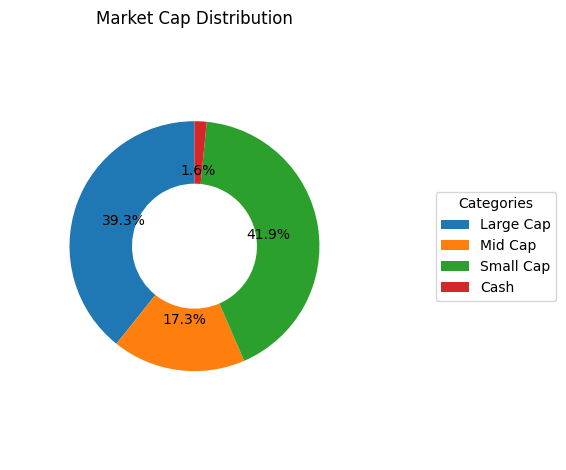

In [181]:
import matplotlib.pyplot as plt

# Calculate the total value
total_value = sum(cap_values.values())

# Calculate percentages for each category
percentages = {key: (value / total_value) * 100 for key, value in cap_values.items()}

# Create a list of labels and sizes
labels = list(percentages.keys())
sizes = list(percentages.values())

# Plotting the donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5)
)

# Add a legend with labels
ax.legend(wedges, labels, title="Categories", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Title
plt.title("Market Cap Distribution")
plt.tight_layout()
plt.savefig('mcap_donut_chart.png')
# Display the chart
plt.show()


In [98]:
import pandas as pd

# Read the market cap and sector allocation files
df_mcap = pd.read_excel("Mcap_stock_codes.xlsx")
df_sector_allocation = pd.read_excel("sector_allocation.xlsx")

# Filter tickers for both market cap and sector allocation
filtered_ticker_list = [ticker[4:] for ticker in ticker_list]
filtered_df_mcap = df_mcap[df_mcap['NSE Symbol'].isin(filtered_ticker_list)]
filtered_df_sector_allocation = df_sector_allocation[df_sector_allocation['NSE Symbol'].isin(filtered_ticker_list)]

# Initialize the final dictionaries to store all cap and sector values
sector_values = {}
# Group the sector allocation data by sector and calculate the total current value for each sector
sectors = filtered_df_sector_allocation.groupby('Sector')

for sector, group in sectors:
    total_sector_value = 0
    for ticker in group['NSE Symbol']:
        nse_ticker = f"NSE:{ticker}"
        if nse_ticker in list(result.keys()):
            total_sector_value += result[nse_ticker][4]  # Adding the 'current_value'
    
    sector_values[sector] = round(total_sector_value, 2)

# Add the cash balance to both dictionaries if needed

print(sector_values)


{'Commodities': 37120.8, 'Consumer Discretionary': 84262.6, 'Fast Moving Consumer Goods': 25576.32, 'Financial Services': 46844.18, 'Healthcare': 57837.82, 'Industrials': 31888.27, 'Information Technology': 38507.05, 'Utilities': 10955.07}


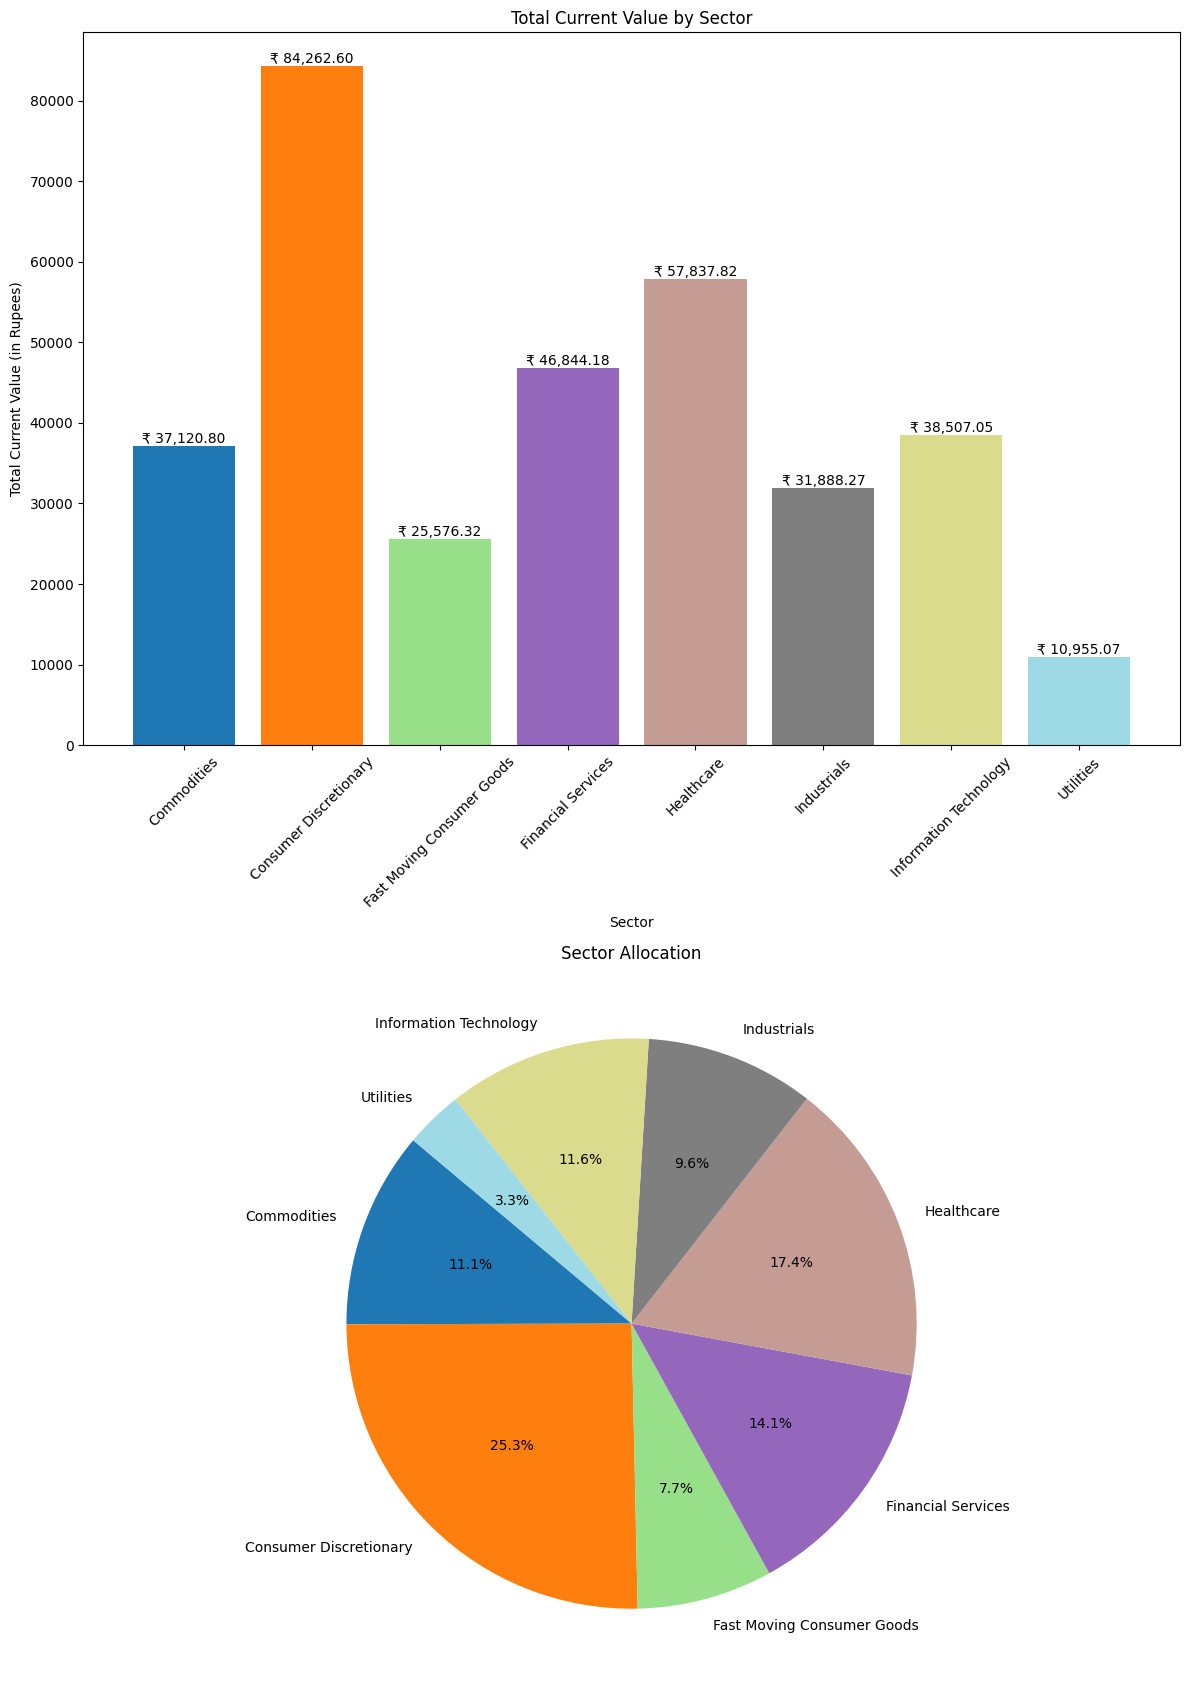

In [197]:
import matplotlib.pyplot as plt
import numpy as np

rupee_sign = "\u20B9"
# Extracting the sector names and their corresponding values
sectors = list(sector_values.keys())
values = list(sector_values.values())

# Define a list of colors, one for each sector
colors = plt.cm.tab20(np.linspace(0, 1, len(sectors)))  # Using a colormap with distinct colors

# Create a single figure for both plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 17))

# Bar chart
bars = ax1.bar(sectors, values, color=colors)
ax1.set_xlabel('Sector')
ax1.set_ylabel('Total Current Value (in Rupees)')
ax1.set_title('Total Current Value by Sector')
ax1.tick_params(axis='x', rotation=45)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{rupee_sign} {height:,.2f}', 
             ha='center', va='bottom')

# Pie chart
ax2.pie(values, labels=sectors, colors=colors, autopct='%1.1f%%', startangle=140)
ax2.set_title('Sector Allocation')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('combined_charts.png')
plt.show()
plt.close()


In [38]:
from fpdf import FPDF
from babel.numbers import format_decimal

# Initialize the PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=10)
pdf.add_page()

# Add a background color for the title
pdf.set_fill_color(200, 220, 255)
pdf.set_font("Arial", "B", 12)  # Bold font for the title
pdf.cell(0, 12, txt="Stock Portfolio Summary", ln=True, align="C", fill=True)
pdf.ln(10)
pdf.set_right_margin(10)

# Add introductory data with bold labels
pdf.set_font("Arial", "B", 10)
pdf.set_text_color(0, 0, 0)

# Format the numbers with Indian commas
formatted_investment_value =  format_decimal(total_investment_value, locale='en_IN')
formatted_market_value     =  format_decimal(market_value, locale='en_IN')
formatted_booked_profit    =  format_decimal(total_booked_profit, locale='en_IN')
formatted_total_profit     =  format_decimal(total_profit_or_loss, locale='en_IN')

# Total Investment Value and Market Value
pdf.cell(50, 10, txt="Total Investment Value:", border=0, align="L")
pdf.set_font("Arial", "", 10)
pdf.cell(50, 10, txt=formatted_investment_value, border=0, align="L")
pdf.set_font("Arial", "B", 10)
pdf.cell(50, 10, txt="Market Value:", border=0, align="L")
pdf.set_font("Arial", "", 10)
pdf.cell(50, 10, txt=formatted_market_value, border=0, align="L")
pdf.ln(10)

# Booked Profit/Loss and Total Profit/Loss
pdf.set_font("Arial", "B", 10)
pdf.cell(50, 10, txt="Booked Profit/Loss:", border=0, align="L")
pdf.set_font("Arial", "", 10)
pdf.cell(50, 10, txt=formatted_booked_profit, border=0, align="L")
pdf.set_font("Arial", "B", 10)
pdf.cell(50, 10, txt="Total Profit/Loss:", border=0, align="L")
pdf.set_font("Arial", "", 10)
pdf.cell(50, 10, txt=formatted_total_profit, border=0, align="L")
pdf.ln(20)

# Set column headers with a background color and border, bold text
pdf.set_fill_color(105, 105, 105)  # Dark gray
pdf.set_text_color(255, 255, 255)  # White text for headers
pdf.set_font("Arial", "B", 10)  # Bold font for headers

# Adjust the width of each column so that it fits within the page
pdf.cell(25, 10, txt="Stock", border=1, align="C", fill=True)
pdf.cell(30, 10, txt="Net Quantity", border=1, align="C", fill=True)
pdf.cell(25, 10, txt="Buy Price", border=1, align="C", fill=True)
pdf.cell(25, 10, txt="Current Price", border=1, align="C", fill=True)
pdf.cell(25, 10, txt="Profit/Loss", border=1, align="C", fill=True)
pdf.cell(30, 10, txt="Profit/Loss%", border=1, align="C", fill=True)
pdf.cell(35, 10, txt="Current Value", border=1, align="C", fill=True)
pdf.ln()

# Add data rows
pdf.set_font("Arial", "", 10)  # Standard font size for data rows
pdf.set_text_color(0, 0, 0)  # Black text for data

for idx, (key, value) in enumerate(result.items()):
    # Alternate row background color for better readability
    if idx % 2 == 0:
        pdf.set_fill_color(245, 245, 245)  # Light gray
        fill = True
    else:
        fill = False

    # Add stock name and quantities
    pdf.cell(25, 10, txt=key[4:], border=1, align="C", fill=fill)  # Stock name without the exchange prefix
    pdf.cell(30, 10, txt=format_decimal(value[0], locale='en_IN'), border=1, align="C", fill=fill)  # Total quantities
    
    # Add buy price
    pdf.cell(25, 10, txt=format_decimal(value[2], locale='en_IN'), border=1, align="C", fill=fill)  # Buy price
    
    # Add current price
    pdf.cell(25, 10, txt=format_decimal(value[1], locale='en_IN'), border=1, align="C", fill=fill)  # Current price

    # Add profit with color coding
    if value[3] >= 0:
        pdf.set_text_color(0, 128, 0)  # Green for profit
    else:
        pdf.set_text_color(255, 0, 0)  # Red for loss
    pdf.cell(25, 10, txt=format_decimal(value[3], locale='en_IN'), border=1, align="C", fill=fill)  # Profit/Loss
    pdf.set_text_color(0, 0, 0)  # Reset text color to black
    
    # Add profit percentage with color coding
    if value[5] >= 0:
        pdf.set_text_color(0, 128, 0)  # Green for positive percentage
    else:
        pdf.set_text_color(255, 0, 0)  # Red for negative percentage
    pdf.cell(30, 10, txt=f"{value[5]:,.2f}%", border=1, align="C", fill=fill)  # Profit percentage
    
    # Reset text color to black and add current value
    pdf.set_text_color(0, 0, 0)
    pdf.cell(35, 10, txt=format_decimal(value[4], locale='en_IN'), border=1, align="C", fill=fill)  # Current value
    pdf.ln()

# Add a footer
pdf.set_y(-15)
pdf.set_font("Arial", "I", 8)  # Footer font size
pdf.set_text_color(128, 128, 128)
pdf.cell(0, 10, txt="End of Report", align="C")

# Save the PDF to a file
pdf.output("stock_portfolio2.pdf")

print("PDF created successfully.")


PDF created successfully.


In [198]:
'''this block of code generates the pdf of the portfolio holdings along with the booked profit/loss, total profit/loss, 
   makrket value, etc. '''

from fpdf import FPDF
from babel.numbers import format_decimal

# Initialize the PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=10)
pdf.add_page()

# Add a background color for the title
pdf.set_fill_color(200, 220, 255)
pdf.set_font("Arial", "B", 12)  # Bold font for the title
pdf.cell(0, 12, txt="Stock Portfolio Summary", ln=True, align="C", fill=True)
pdf.ln(5)
pdf.set_right_margin(10)

# Add introductory data with bold labels
pdf.set_font("Arial", "B", 10)
pdf.set_text_color(0, 0, 0)

# Format the numbers with Indian commas
formatted_investment_value =  format_decimal(total_investment_value, locale='en_IN')
formatted_market_value     =  format_decimal(market_value, locale='en_IN')
formatted_booked_profit    =  format_decimal(total_booked_profit, locale='en_IN')
formatted_total_profit     =  format_decimal(total_profit_or_loss, locale='en_IN')

# Total Investment Value and Market Value
pdf.cell(50, 10, txt="Total Investment Value:", border=0, align="L")
pdf.set_font("Arial", "", 10)
pdf.cell(50, 10, txt=formatted_investment_value, border=0, align="L")
pdf.set_font("Arial", "B", 10)
pdf.cell(50, 10, txt="Market Value:", border=0, align="L")
pdf.set_font("Arial", "", 10)
pdf.cell(50, 10, txt=formatted_market_value, border=0, align="L")
pdf.ln(7)

# Booked Profit/Loss and Total Profit/Loss
pdf.set_font("Arial", "B", 10)
pdf.cell(50, 10, txt="Booked Profit/Loss:", border=0, align="L")
pdf.set_font("Arial", "", 10)
pdf.cell(50, 10, txt=formatted_booked_profit, border=0, align="L")
pdf.set_font("Arial", "B", 10)
pdf.cell(50, 10, txt="Total Profit/Loss:", border=0, align="L")
pdf.set_font("Arial", "", 10)
pdf.cell(50, 10, txt=formatted_total_profit, border=0, align="L")
pdf.ln(10)

# Set column headers with a background color and border, bold text
pdf.set_fill_color(105, 105, 105)  # Dark gray
pdf.set_text_color(255, 255, 255)  # White text for headers
pdf.set_font("Arial", "B", 10)  # Bold font for headers

# Adjust the width of each column so that it fits within the page
pdf.cell(30, 10, txt="Stock",        border=1, align="C", fill=True)
pdf.cell(30, 10, txt="Net Quantity", border=1, align="C", fill=True)
pdf.cell(25, 10, txt="Buy Price",    border=1, align="C", fill=True)
pdf.cell(25, 10, txt="Current Price",border=1, align="C", fill=True)
pdf.cell(25, 10, txt="Profit/Loss",  border=1, align="C", fill=True)
pdf.cell(30, 10, txt="Profit/Loss%", border=1, align="C", fill=True)
pdf.cell(30, 10, txt="Current Value",border=1, align="C", fill=True)
pdf.ln()

# Add data rows
pdf.set_font("Arial", "", 10)  # Standard font size for data rows
pdf.set_text_color(0, 0, 0)  # Black text for data

for idx, (key, value) in enumerate(result.items()):
    # Alternate row background color for better readability
    if idx % 2 == 0:
        pdf.set_fill_color(245, 245, 245)  # Light gray
        fill = True
    else:
        fill = False

    # Add stock name and quantities
    pdf.cell(30, 10, txt=key[4:], border=1, align="C", fill=fill)  # Stock name without the exchange prefix
    pdf.cell(30, 10, txt=format_decimal(value[0], locale='en_IN'), border=1, align="C", fill=fill)  # Total quantities
    
    # Add buy price
    pdf.cell(25, 10, txt=format_decimal(value[2], locale='en_IN'), border=1, align="C", fill=fill)  # Buy price
    
    # Add current price
    pdf.cell(25, 10, txt=format_decimal(value[1], locale='en_IN'), border=1, align="C", fill=fill)

    # Add profit with color coding
    if value[3] >= 0:
        pdf.set_text_color(0, 128, 0)  # Green for profit
    else:
        pdf.set_text_color(255, 0, 0)  # Red for loss
    pdf.cell(25, 10, txt=format_decimal(value[3], locale='en_IN'), border=1, align="C", fill=fill)  # Profit/Loss
    pdf.set_text_color(0, 0, 0)  # Reset text color to black
    
    # Add profit percentage with color coding
    if value[5] >= 0:
        pdf.set_text_color(0, 128, 0)  # Green for positive percentage
    else:
        pdf.set_text_color(255, 0, 0)  # Red for negative percentage
    pdf.cell(30, 10, txt=f"{value[5]:,.2f}%", border=1, align="C", fill=fill)  # Profit percentage
    
    # Reset text color to black and add current value
    pdf.set_text_color(0, 0, 0)
    pdf.cell(30, 10, txt=format_decimal(value[4], locale='en_IN'), border=1, align="C", fill=fill)  # Current value
    pdf.ln()

# Add the charts in the same section
pdf.add_page()                 

# Insert the bar chart image
pdf.image("combined_charts.png", x=10, y=10, w=190)  # Adjust x, y, w as needed

# Move down to add the pie chart
pdf.add_page()

# Insert the pie chart image
pdf.image("mcap_donut_chart.png", x=50, y=10, w=150)  # Adjust x, y, w as needed

# Add a footer
pdf.set_y(-15)
pdf.set_font("Arial", "I", 8)  # Footer font size
pdf.set_text_color(128, 128, 128)
pdf.cell(0, 10, txt="End of Report", align="C")

# Save the PDF to a file
pdf.output("stock_portfolio_with_charts.pdf")

print("PDF with charts created successfully.")


PDF with charts created successfully.
